# Customer Segmentation (Unsupervised)

This notebook performs Exploratory Data Analysis (EDA), cleaning, feature preprocessing, and modeling on `clustering_dataset.csv`.

**Type:** Clustering


## 1. Imports & setup

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, mean_absolute_error, mean_squared_error, r2_score

## 2. Load & preview data

In [2]:
# Load dataset
df = pd.read_csv('clustering_dataset.csv')
#print shape of data
print(df.shape)
#print tail
df.tail()

(1000, 6)


,recency_days,frequency,monetary,visits_per_month,lifetime_value,satisfaction
995,NaN,9.0,80.382019,20.0,0.000000,2.0
996,54.118613,7.0,343.632664,26.0,14846.583601,2.0
997,37.262096,11.0,NaN,25.0,NaN,2.0
998,9.067235,9.0,1236.986185,4.0,7248.783380,6.0
999,NaN,14.0,NaN,16.0,NaN,1.0


## 3. Exploratory Data Analysis (EDA)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   recency_days      911 non-null    float64
 1   frequency         903 non-null    float64
 2   monetary          880 non-null    float64
 3   visits_per_month  899 non-null    float64
 4   lifetime_value    899 non-null    float64
 5   satisfaction      895 non-null    float64
dtypes: float64(6)
memory usage: 47.0 KB
None
       recency_days   frequency      monetary  visits_per_month  \
count    911.000000  903.000000    880.000000        899.000000   
mean      30.067941   10.034330    544.718724         14.676307   
std       30.905844    3.161214   1474.836636          8.717083   
min        0.046753    1.000000      0.051189          0.000000   
25%        9.110705    8.000000    152.419496          7.000000   
50%       20.414091   10.000000    334.003827         15.000000   
75% 

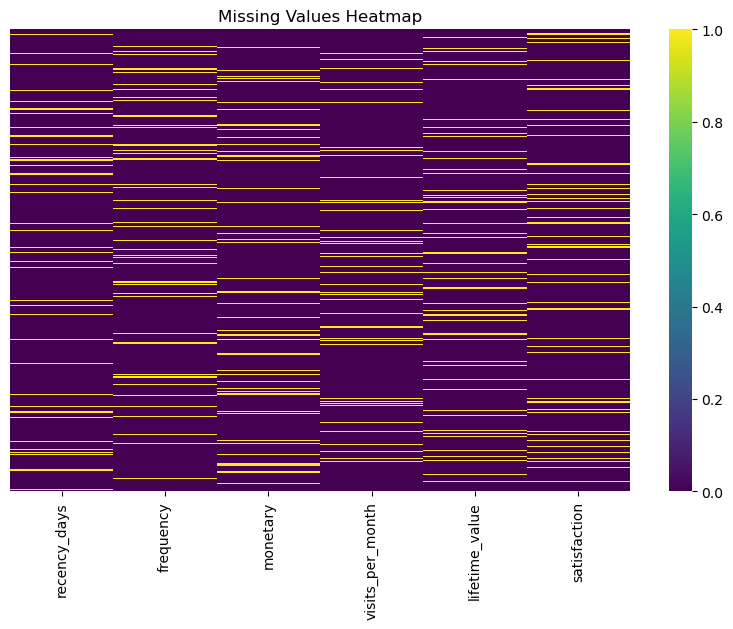

In [4]:
# Basic EDA
print(df.info())
print(df.describe())
# Missing data heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

## 4. Data Cleaning & Preprocessing

In [52]:
# Handle missing values and scale features
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()

imputer = SimpleImputer(strategy='median')
df_imputed = pd.DataFrame(imputer.fit_transform(df[numeric_features]), 
                        columns=numeric_features)

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_imputed), 
                        columns=numeric_features)

## 5. Modeling & Evaluation

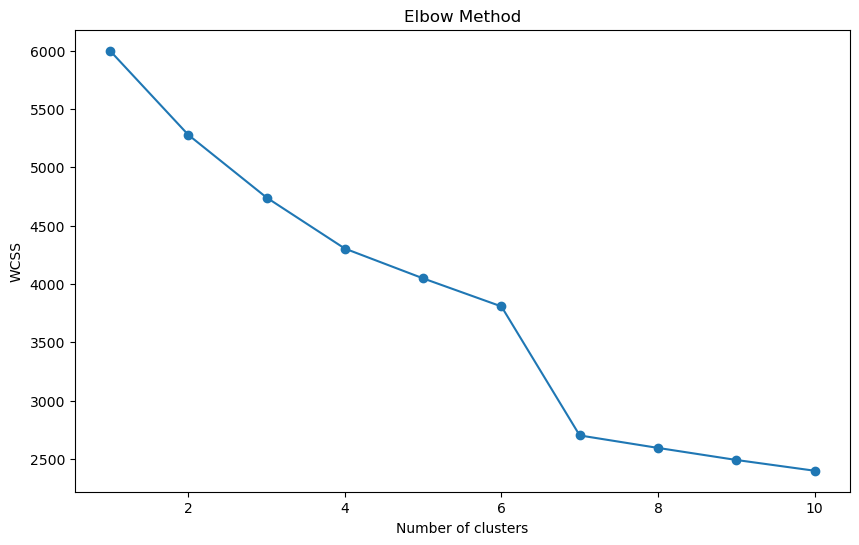

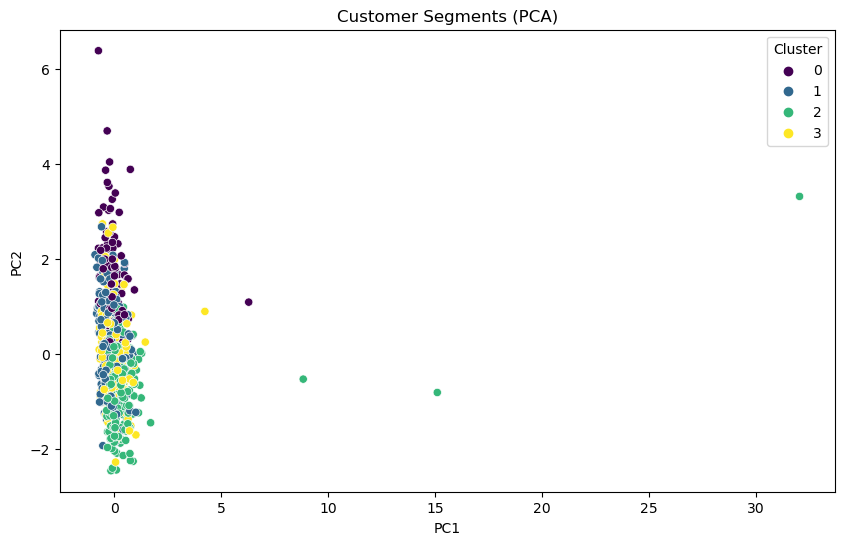

Cluster sizes: 0    110
1    326
2    305
3    259
dtype: int64
Explained variance by PCA: [0.2577504  0.17947246]

Cluster statistics:
Cluster 0: 110 customers
  Mean values: {'recency_days': 92.14, 'frequency': 10.96, 'monetary': 456.45, 'visits_per_month': 13.81, 'lifetime_value': 9914.58, 'satisfaction': 5.74, 'Cluster': 0.0}

Cluster 1: 326 customers
  Mean values: {'recency_days': 22.09, 'frequency': 10.29, 'monetary': 459.43, 'visits_per_month': 21.05, 'lifetime_value': 6418.31, 'satisfaction': 7.33, 'Cluster': 1.0}

Cluster 2: 305 customers
  Mean values: {'recency_days': 22.75, 'frequency': 9.59, 'monetary': 618.76, 'visits_per_month': 15.82, 'lifetime_value': 10632.36, 'satisfaction': 2.5, 'Cluster': 2.0}

Cluster 3: 259 customers
  Mean values: {'recency_days': 19.04, 'frequency': 9.82, 'monetary': 504.74, 'visits_per_month': 5.81, 'lifetime_value': 7381.25, 'satisfaction': 7.07, 'Cluster': 3.0}



In [54]:
# Clustering example (KMeans)
def s_kmeans(X, n_clusters, max_iters=100):
  
    np.random.seed(42)
    centroids = X[np.random.choice(X.shape[0], n_clusters, replace=False)]
    
    for _ in range(max_iters):
      
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(n_clusters)])
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids
    
    return labels, centroids

# Calculate WCSS for elbow method
wcss = []
for i in range(1, 11):
    labels, centroids = simple_kmeans(df_scaled.values, i)
    
    # Calculate WCSS correctly
    cluster_distances = []
    for j in range(i):
        cluster_points = df_scaled.values[labels == j]
        if len(cluster_points) > 0:
            distances = np.linalg.norm(cluster_points - centroids[j], axis=1)
            cluster_distances.append(np.sum(distances**2))
    
    wcss.append(np.sum(cluster_distances))

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Apply clustering with optimal k
optimal_k = 4  
clusters, centroids = simple_kmeans(df_scaled.values, optimal_k)

# PCA for visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_scaled)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = clusters

plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='viridis')
plt.title('Customer Segments (PCA)')
plt.show()

print(f"Cluster sizes: {pd.Series(clusters).value_counts().sort_index()}")
print(f"Explained variance by PCA: {pca.explained_variance_ratio_}")

# here is to add cluster labels to original data
df_clustered = df_imputed.copy()
df_clustered['Cluster'] = clusters

# cluster statistics
print("\nCluster statistics:")
for cluster in range(optimal_k):
    cluster_data = df_clustered[df_clustered['Cluster'] == cluster]
    print(f"Cluster {cluster}: {len(cluster_data)} customers")
    print(f"  Mean values: {cluster_data.mean().round(2).to_dict()}\n")